In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import statsmodels.api as sm

In [82]:
df_covid_ny = pd.read_csv("New_York_State_Statewide_COVID-19_Testing.csv")
df_ny_counties_demo = pd.read_csv("TDI_Capstone_NY_Counties_Demo.csv")
df_covid_ny= df_covid_ny.iloc[:,0:7]

In [83]:
df_covid_ny = df_covid_ny[(pd.to_datetime(df_covid_ny['Test Date']) >= "2020-04-10") & (pd.to_datetime(df_covid_ny['Test Date']) < "2020-05-23")]

df_covid_ny= df_covid_ny.set_index(['County'])

df_covid_ny['Test Date'] = pd.to_datetime(df_covid_ny['Test Date'])

df_covid_ny.head()



,Test Date,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,% pos
County,,,,,,
Albany,2020-04-10,20,446,159,5124,12.58
Albany,2020-04-11,32,478,223,5347,14.35
Albany,2020-04-12,21,499,193,5540,10.88
Albany,2020-04-13,36,535,216,5756,16.67
Albany,2020-04-14,13,548,106,5862,12.26


In [84]:
df_ny_counties_demo= df_ny_counties_demo.set_index(['County'])

df_ny_counties_demo= df_ny_counties_demo[['Population Density Est. (2019)', 'Median Age', 'Poverty Rate %','groups']]

df_ny_counties_demo.head()

,Population Density Est. (2019),Median Age,Poverty Rate %,groups
County,,,,
Albany,584.364958,37.9,12%,2
Allegany,44.778541,38.8,17%,3
Bronx,33686.627080,34.4,29.10%,1
Broome,269.900959,39.8,17%,1
Cattaraugus,58.177858,42.0,16.50%,3


In [85]:
df_merged = pd.merge(df_covid_ny, df_ny_counties_demo['groups'], how='left', left_index=True, right_index=True)
df_merged.head()

,Test Date,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,% pos,groups
County,,,,,,,
Albany,2020-04-10,20,446,159,5124,12.58,2
Albany,2020-04-11,32,478,223,5347,14.35,2
Albany,2020-04-12,21,499,193,5540,10.88,2
Albany,2020-04-13,36,535,216,5756,16.67,2
Albany,2020-04-14,13,548,106,5862,12.26,2


In [86]:
df_agg = df_merged.groupby(['groups', 'Test Date']).agg({"New Positives":np.sum, 
                                             "Total Number of Tests Performed":np.sum})
df_agg

New Positives  Total Number of Tests Performed
groups Test Date                                                 
1      2020-04-10           4034                             8955
       2020-04-11           3317                             8090
       2020-04-12           2414                             5929
       2020-04-13           2846                             7453
       2020-04-14           6095                            13337
...                          ...                              ...
4      2020-05-18             15                              722
       2020-05-19             44                             1280
       2020-05-20             27                             1326
       2020-05-21             16                             1426
       2020-05-22             23                             1536

[172 rows x 2 columns]

In [87]:
df_agg = df_agg.reset_index().set_index('groups')
df_agg


,Test Date,New Positives,Total Number of Tests Performed
groups,,,
1,2020-04-10,4034,8955
1,2020-04-11,3317,8090
1,2020-04-12,2414,5929
1,2020-04-13,2846,7453
1,2020-04-14,6095,13337
...,...,...,...
4,2020-05-18,15,722
4,2020-05-19,44,1280
4,2020-05-20,27,1326


In [88]:
df_agg['positivity_rate'] = (df_agg['New Positives']/ df_agg['Total Number of Tests Performed'])*100
df_agg.head()

,Test Date,New Positives,Total Number of Tests Performed,positivity_rate
groups,,,,
1,2020-04-10,4034,8955,45.047460
1,2020-04-11,3317,8090,41.001236
1,2020-04-12,2414,5929,40.715129
1,2020-04-13,2846,7453,38.185965
1,2020-04-14,6095,13337,45.699933


In [89]:
df_agg = df_agg.reset_index()
df_agg.head()

,groups,Test Date,New Positives,Total Number of Tests Performed,positivity_rate
0,1,2020-04-10,4034,8955,45.047460
1,1,2020-04-11,3317,8090,41.001236
2,1,2020-04-12,2414,5929,40.715129
3,1,2020-04-13,2846,7453,38.185965
4,1,2020-04-14,6095,13337,45.699933


In [91]:
#Linear Regression

model = sm.OLS.from_formula("positivity_rate ~ groups", data=df_agg)
result = model.fit()
result.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        positivity_rate   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     37.01
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           7.56e-09
Time:                        22:42:27   Log-Likelihood:                -633.49
No. Observations:                 172   AIC:                             1271.
Df Residuals:                     170   BIC:                             1277.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.6831      1.808     12.547      0.000      19.114      26.252
groups        -4.0157      0.660     -6.083      0.000      -5.319      -2.713
==============================================================================
Omnibus:                       22.296   Durbin-Watson:                   0.240
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.707
Skew:                           0.937   Prob(JB):                     1.59e-06
Kurtosis:                       3.465   Cond. No.                         7.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, '% Positivity Rate')

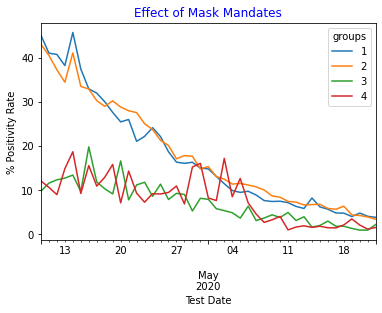

In [92]:
df_agg = df_agg.pivot(index='Test Date', columns='groups', values='positivity_rate')

df_agg.plot()

 
# Add titles
plt.title("Effect of Mask Mandates", loc='center', fontsize=12, fontweight=0, color='blue')
plt.xlabel("Test Date")
plt.ylabel("% Positivity Rate")

